### Homework 1 ###


Hasan Cetin, Lucas Belmudes

<hr>

In [17]:
%matplotlib inline

import numpy as np
import numba as nb
import warnings
import time
import pandas as pd
from numba import jit, njit
import matplotlib.pyplot as plt

plt.style.use('ggplot')

warnings.filterwarnings("ignore", category=RuntimeWarning) 

plt.rcParams["figure.figsize"] = (12,12)

### Exercise 1

#### Rounding error ####

Given $a=1$, $b=100000$, $c=10^n$ where $n=-1,-2,...,8$ we can find both roots of the polynomial:

$$ax^2+bx+c$$

by solving 

$$x_1 = \frac{-b+\sqrt{b^2-4ac}}{2a} $$
$$x_2 = \frac{-b-\sqrt{b^2-4ac}}{2a} $$

Denote $x^n_1, x_2^n$ the corresponding root using $c^n$. Note that as $n$ grows the term in the square brakets tends to $b^2$, since $4ac\to 0$. Althought it might be true in the limit, is not true that for $n=7$ or even $n=8$, but thats not what we obtain when we solve for this roots numerically. The reason behind this is the machine accuracy $\epsilon_m$. Following Numerical recipes in Fortran 77:

 "Pretty much any arithmetic operation among floating numbers should be thought of as introducing an addittional fractional error of at least $\epsilon$. This type of error is called roundoff error."[...]"Roudnoff errors accumulate with increasing amounts of calculations".[...]" Substraction of two nearly equal numbers can vastly increase the roundoff error."

 Note that starting at $n=7$ both roots don't seem to take the term $4ac$ into account, when computing the square root of $b^2$. Starting from that $n$ onwards, the roundoff error makes governs the results for the numerical roots.

<center>

| $n$  |$x_1$ |   $x_2$ |
| --- | --- | --- |
| 1 | -1.0000003385e-06 | -99999.999999
| 2 | -1.0000076145e-07  |-99999.9999999    
| 3 | -9.9971657619e-09  |-99999.99999999   
| 4 | -1.0040821508e-09  |-99999.999999999  
| 5 | -1.0186340660e-10  |-99999.9999999999 
| 6 | -7.2759576142e-12  |-100000.          
| 7 | 0.0000000000e+00   |-100000.          
| 8 | 0.0000000000e+00  | -100000.  

</center>


In [2]:
class Exercise_1:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    def Method_1(self):
        self.r_1 = (-self.b + np.sqrt(self.b**2 - 4 * self.a * self.c))  / (2)
        self.r_2 = (-self.b - np.sqrt(self.b**2 - 4 * self.a * self.c))  / (2)
        

In [3]:
a, b, c = np.ones(8), 100000 * np.ones(8), (10 *np.ones(8)) ** np.linspace(-1, -8, 8, dtype=int)
Ex1 = Exercise_1(a, b, c)
Ex1.Method_1()
Ex1.r_1, Ex1.r_2

(array([-1.00000034e-06, -1.00000761e-07, -9.99716576e-09, -1.00408215e-09,
        -1.01863407e-10, -7.27595761e-12,  0.00000000e+00,  0.00000000e+00]),
 array([ -99999.999999  ,  -99999.9999999 ,  -99999.99999999,
        -100000.        , -100000.        , -100000.        ,
        -100000.        , -100000.        ]))

<hr>

### Exercise 2

Prosition: $\phi^n+1=\phi^n-1-\phi^n$ for $\phi=\frac{\sqrt{5}-1}{2}$.

Proof: $$   \phi^{n+_1}=\phi^n-1-\phi^n $$
        $$   \left(\frac{\sqrt{5}-1}{2}\right)^{n+_1}=\left(\frac{\sqrt{5}-1}{2}\right)^n-1-\left(\frac{\sqrt{5}-1}{2}\right)^n $$
        $$ \left(\frac{\sqrt{5}-1}{2}\right) \left(\frac{\sqrt{5}-1}{2}\right)^n = \left(\frac{\sqrt{5}-1}{2}\right)^{n-1} -\left(\frac{\sqrt{5}-1}{2}\right)^n$$
        $$ \left(\frac{\sqrt{5}-1}{2}\right)  = \left(\frac{\sqrt{5}-1}{2}\right)^{-1} -1$$
        $$ \left(\frac{\sqrt{5}-1}{2}\right)  = \left(\frac{2}{\sqrt{5}-1}\right)^{-1} -1$$
        $$ 0  = 0$$


Following Numerical recipies in Fortran 77:

"There is another, different, kind of error that is a characteristic of the program or algorithm used,
independent of the hardware on which the program is executed."[...]"The discrepancy between the true answer and the answer obtained in a practical
calculation is called the truncation error. Truncation error would persist even on a hypothetical, “perfect” computer that had an infinitely accurate representation and no
roundoff error."[...]"Sometimes, however, an otherwise attractive method can be unstable. This means that any roundoff error that becomes “mixed into” the calculation at an early
stage is successively magnified until it comes to swamp the true answer. An unstable method would be useful on a hypothetical, perfect computer; but in this imperfect
world it is necessary for us to require that algorithms be stable — or if unstable that we use them with great caution."

The example computed below shows a clear example of an unstable vs a stable algorithm. We construct 2 sequences for $\{\psi^n\}$, following the two methods proposed in the exercise. We clearly see that when using the unstable algorithm the sequence diverges from its limit point. 



In [4]:
class Exercise2:
    def __init__(self, n):
        self.n = n
        self.ϕ = np.ones(n)
        self.ϕ[0] = 0
        self.ϕ[1] = 0.61803398
        self.ψ = self.ϕ.copy()
        for i in range(2, self.n-2, 1):
            self.ϕ[i+2] = self.ϕ[i] - self.ϕ[i+1]
            self.ψ[i+2] = self.ψ[1]**(i+2)

    def plot(self):
        fig, ax = plt.subplots(figsize=(20, 3))
        grid = range(0, self.n, 1)
        plt.plot(grid, self.ϕ, label='$\phi^n_{Algorithm}$', alpha=0.6)
        plt.plot(grid, self.ψ, label='$\phi^n_{Raising}$', alpha=0.6)
        plt.xlabel('n')
        plt.title('Comparison for different algorithms')
        plt.xticks(grid)
        plt.legend()
        plt.show()

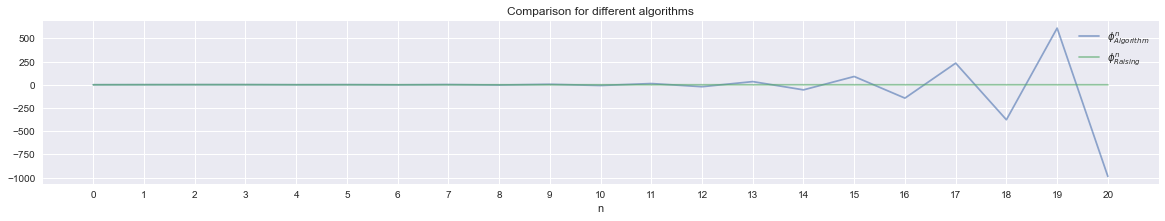

In [5]:
Ex2 = Exercise2(21)
Ex2.φ
Ex2.plot()

<hr>

### Exercise 3: Deterministic Neoclassical Growth Model

The functional equation of our deterministic neoclassical growth problem is as follows:

$$V(k) = \max_{\{c,k'\}} \; \{log(c) + \beta V(k')\}$$
$$\text{s.t. } c + k' = Ak^\alpha + (1-\delta)k$$
$$c,k' \geq 0$$

We can rewrite the problem as:

$$V(k) = \max_{k'}\; \{log(Ak^\alpha + (1-\delta)k - k') + \beta V(k')\}$$
$$\text{s.t. } k' \geq 0$$

Let's first find the steady state of capital in this problem.

The FOC and the Envelope conditions are:

\begin{align}
&(k'): \dfrac{1}{Ak^\alpha + (1-\delta)k - k'} = \beta V'(k')\\
&(Env): V'(k) = \dfrac{\alpha A k^{\alpha-1} + (1-\delta)}{Ak^\alpha + (1-\delta)k - k'}\\  
\end{align}

Since Envelope conditions hold for every period, we have: 

$$V'(k') = \dfrac{\alpha A k'^{\alpha-1} + (1-\delta)}{Ak'^\alpha + (1-\delta)k' - k''}$$

We can put $V'(k')$ in the FOC condition and get:

$$\dfrac{1}{Ak^\alpha + (1-\delta)k - k'} = \beta  \dfrac{\alpha A k'^{\alpha-1} + (1-\delta)}{Ak'^\alpha + (1-\delta)k' - k''}$$

In steady state:

$$1 = \alpha \, \beta \,A\, k_{ss}^{\alpha-1} + \beta(1-\delta)$$

So our steady state capital is:

$$k_{ss} = \left[\dfrac{1 - (1-\delta)\beta}{\alpha \beta A}\right]^{\frac{1}{\alpha-1}}$$

Equivalently:

$$k_{ss} = \left[\dfrac{\alpha \beta A}{1 - (1-\delta)\beta}\right]^{\frac{1}{1 - \alpha}}$$



### 3.1) Basic VFI:

In basic VFI, our algorithm will be:

- Step 0: Create an appropriate grid for the state variable k: $G_k$. Set n=0. Choose an initial guess $V_0$.
- Step 1: For each element k_i in the $G_k$ grid, execute the mapping $V_{n+1}(k_i) = TV_n(k),\; \text{where } k \in G_k$.
- Step 2: Iterate step 1 until convergence criterion is satisfied: $||V_{n+1} - V_n||\, < \,tolerance$

In [6]:
@njit
def Basic_VFI(k_min=0.5,  grid_size=11, α=0.7, β=0.98, δ=1, A=2, max_iter=10e5, toler = 10e-5):
    k_ss = ((α * β * A)/(1 - (1-δ)*β))**(1/(1-α)) #steady state for capital
    k_max=2*k_ss - k_min
    G_k = np.linspace(k_min, k_max, grid_size)    #G_k
    Γ = np.zeros(grid_size)                       #Grid for decision rule
    V_0 = np.zeros(grid_size)                     #initial guess V_0
    V_1 = np.ones(grid_size)                      #aux

    dist =1000                                    #aux distance
    iteration = 0                                 #iteration

    #Convergence
    while dist > toler and iteration < max_iter:
        for i in range(grid_size):
            Values = np.log(A*G_k[i]**α + (1-δ)*G_k[i] - G_k) + β * V_0
            Values[np.isnan(Values)] = -10000
            V_1[i] = np.max(Values)
            Γ[i] = np.argmax(Values)
        dist = np.max(np.abs(V_1 - V_0))
        V_0 = np.copy(V_1)
        iteration = iteration + 1

    return V_0, Γ, G_k, iteration, dist, k_ss



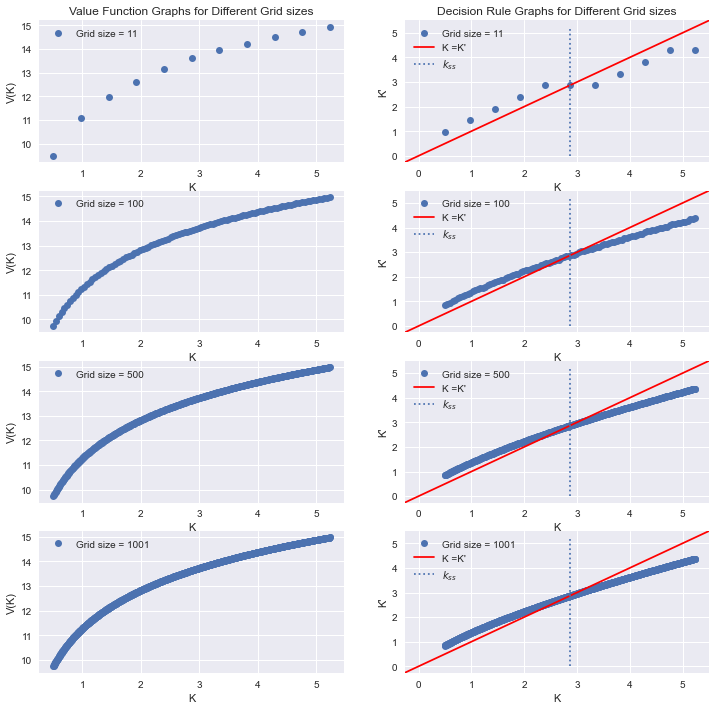

In [7]:
#Graphing

Grids = [11,100,500,1001]    

fig,ax = plt.subplots(len(Grids),2)
j = 0

for j, grid in enumerate(Grids):
    V, Γ, G_k, iteration, dist, k_ss = Basic_VFI(grid_size = grid)


    ax[j,0].plot(G_k,V, 'o',label="Grid size = {}".format(grid))
    ax[j,0].set_xlabel('K')
    ax[j,0].set_ylabel('V(K)')
    ax[0,0].set_title("Value Function Graphs for Different Grid sizes")
    ax[j,0].legend()
    
    ax[j,1].plot(G_k, G_k[Γ.astype(np.int64)], 'o', label = 'Grid size = {}'.format(grid))
    ax[j,1].axline((0,0), (np.max(G_k), np.max(G_k)), color='r', label="K =K'")
    ax[j,1].vlines(k_ss, ymin=0, ymax=max(G_k),linestyles='dotted',label='$k_{ss}$')
    ax[j,1].legend()
    ax[j,1].set_xlabel('K')
    ax[j,1].set_ylabel("K'")
    ax[0,1].set_title("Decision Rule Graphs for Different Grid sizes")
    

Let's show that our numerical approximation is really close to the analytical answer:

We know that this model can be solved by guess and verify method by guessing: $a_0 + a_1 log(k)$. And if we solve it we could verify that:

$$a_0 = \dfrac{1}{1-\beta}\dfrac{1}{1-\alpha\beta}\left[log(A) + (1-\alpha\beta)log(1-\alpha\beta)+\alpha\beta log(\alpha\beta)/\right], \; a_1 = \dfrac{\alpha}{1-\alpha\beta}$$

In our case, with our parameters, $(a_0, a_1)$ will be:

$$(a_0, a_1) = (11.2817 , 2.2292)$$

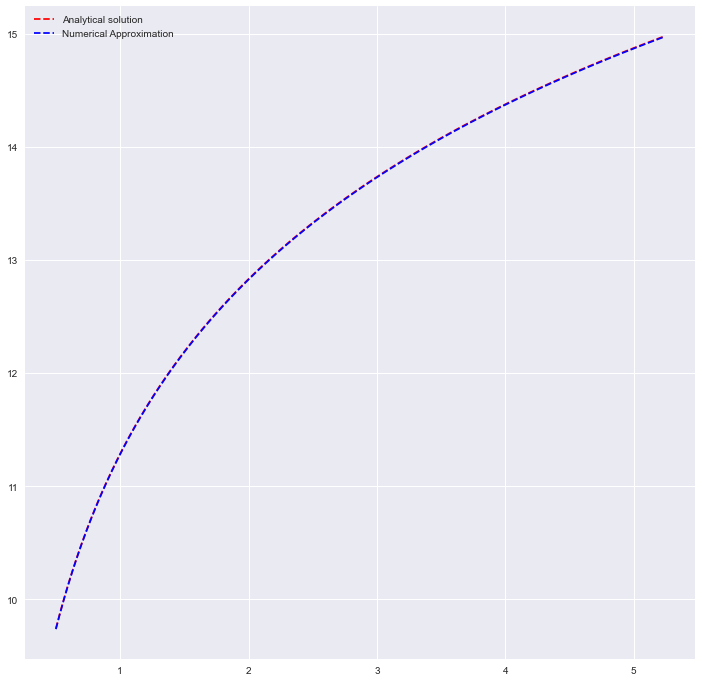

In [8]:
#Graphing Analytical and Numerical Solutions

α, β, δ, A = 0.7, 0.98, 1, 2

a_1 = α / (1-α*β)
a_0 = (1/(1-β))*(1 / (1-α*β))*(np.log(A) + (1-α*β)*np.log(1-α*β) + α*β*np.log(α*β) )

anal = a_0 + np.log(G_k)*a_1

fig,ax = plt.subplots()

ax.plot(G_k, anal, 'r--', label='Analytical solution')
ax.plot(G_k, V, 'b--', label='Numerical Approximation')
ax.legend()
plt.show()

As you can see, it is a very good approximation.

let's do the same analysis for $\delta < 1$.

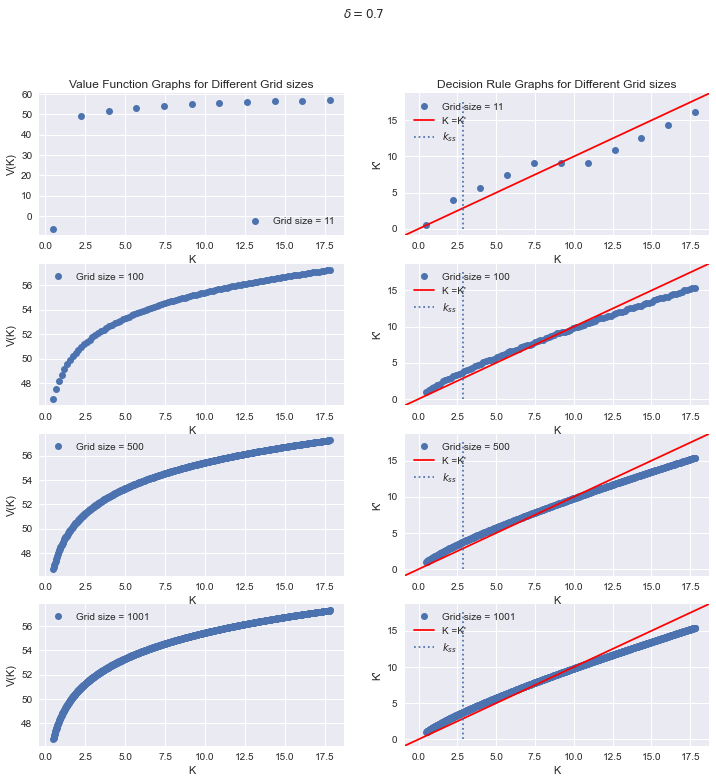

In [9]:
#Graphing \delta = 0.7

Grids = [11,100,500,1001]    

fig,ax = plt.subplots(len(Grids),2)
j = 0

for j, grid in enumerate(Grids):
    V, Γ, G_k,_,_,_ = Basic_VFI(grid_size = grid, δ = 0.7)

    Decision = np.empty(shape=(Γ.shape))
    for i in range(Γ.shape[0]):
        Decision[i] = G_k[int(Γ[i])]

    ax[j,0].plot(G_k,V, 'o',label="Grid size = {}".format(grid))
    ax[j,0].set_xlabel('K')
    ax[j,0].set_ylabel('V(K)')
    ax[0,0].set_title("Value Function Graphs for Different Grid sizes")
    ax[j,0].legend()
    
    ax[j,1].plot(G_k, Decision, 'o', label = 'Grid size = {}'.format(grid))
    ax[j,1].axline((0,0), (np.max(G_k), np.max(G_k)), color='r', label="K =K'")
    ax[j,1].vlines(k_ss, ymin=0, ymax=max(G_k),linestyles='dotted',label='$k_{ss}$')
    ax[j,1].legend()
    ax[j,1].set_xlabel('K')
    ax[j,1].set_ylabel("K'")
    ax[0,1].set_title("Decision Rule Graphs for Different Grid sizes")
    fig.suptitle('$\delta   = 0.7$')

### 3.2) Policy Function Iteration

In [10]:
@njit
def Howard(k_min=0.5,  grid_size=11, α=0.7, β=0.98, δ=1, A=2, max_iter=10e4, toler = 10e-5, m=50):
    k_ss = ((α * β * A)/(1 - (1-δ)*β))**(1/(1-α)) #steady state for capital
    k_max=2*k_ss - k_min                          #max of the grid
    G_k = np.linspace(k_min, k_max, grid_size)    #G_k
    Γ = np.zeros(grid_size).astype(np.int64)      #Grid for decision rule
    V_0 = np.zeros(grid_size)                      #initial guess V_0
    V_1 = np.ones(grid_size)                      #aux

    dist =1000                                    #aux distance
    iteration = 0                                 #iteration

    #VFI PART
    while dist > toler and iteration < max_iter:
        for i in range(grid_size):
            Values = np.log(A*G_k[i]**α + (1-δ)*G_k[i] - G_k) + β * V_0
            Values[np.isnan(Values)] = -10000
            Γ[i] = np.argmax(Values)

        V = V_0.copy()
    #HOWARD PART
        for _ in range(m):
            V_1 = np.log(A*(G_k)**α + (1-δ)*G_k - G_k[Γ]) + β * V_0[Γ]
            V_0 = V_1.copy() 
        dist = np.max(np.abs(V_1 - V))
        iteration += 1
    return V_0, Γ, iteration, dist
        

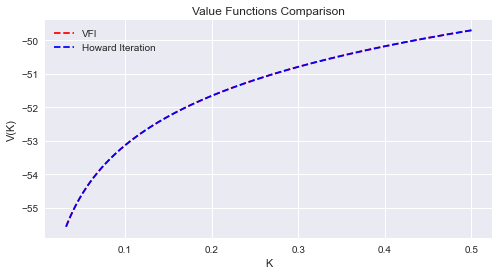

In [11]:
plt.rcParams["figure.figsize"] = (8,4)
#Howard and VFI Graphing

V_Howard, _,iteration_Howard,_= Howard(δ=1, A =1, β=0.96, grid_size=1001)
V_vfi,_, G_k_vfi, iteration_vfi,_,_= Basic_VFI(δ=1, A =1, β=0.96, grid_size=1001)

fig, ax = plt.subplots()

ax.plot(G_k_vfi, V_vfi, 'r--', label='VFI')
ax.plot(G_k_vfi, V_Howard, 'b--', label='Howard Iteration')
ax.set_title('Value Functions Comparison')
ax.set_xlabel('K')
ax.set_ylabel("V(K)")
ax.legend()
plt.show()

### 3.3) MQP Method

In [12]:
@njit
def MQP(k_min=0.5,  grid_size=11, α=0.7, β=0.98, δ=1, A=2, max_iter=10e5, toler = 10e-5, mqp_iter = 1):
    k_ss = ((α * β * A)/(1 - (1-δ)*β))**(1/(1-α)) #steady state for capital
    k_max=2*k_ss - k_min
    G_k = np.linspace(k_min, k_max, grid_size)    #G_k
    Γ = np.zeros(grid_size)                       #Grid for decision rule
    V_0 = np.zeros(grid_size)                     #initial guess V_0
    V_1 = np.ones(grid_size)                      #aux

    dist =1000                                    #aux distance
    iteration = 0                                 #iteration

    #Convergence
    while dist > toler and iteration < max_iter:
        for i in range(grid_size):
            Values = np.log(A*G_k[i]**α + (1-δ)*G_k[i] - G_k) + β * V_0
            Values[np.isnan(Values)] = -10000
            V_1[i] = np.max(Values)
            Γ[i] = np.argmax(Values)
        c_low = np.min(np.abs(V_1-V_0))
        c_high = np.max(np.abs(V_1-V_0))
        if iteration % mqp_iter == 0:
            dist = c_high - c_low
        V_0 = np.copy(V_1)
        iteration = iteration +1
    
    V = V_0 + (c_low + c_high)/2

    return V, Γ, iteration, dist



In [13]:
@njit
def MQP_Howard(k_min=0.5,  grid_size=11, α=0.7, β=0.98, δ=1, A=2, max_iter=10e4, toler = 10e-5, m=1):
    k_ss = ((α * β * A)/(1 - (1-δ)*β))**(1/(1-α)) #steady state for capital
    k_max=2*k_ss - k_min                          #max of the grid
    G_k = np.linspace(k_min, k_max, grid_size)    #G_k
    Γ = np.zeros(grid_size).astype(np.int64)      #Grid for decision rule
    V_0 = np.zeros(grid_size)                      #initial guess V_0
    V_1 = np.ones(grid_size)                      #aux

    dist =1000                                    #aux distance
    iteration = 0                                 #iteration

    #VFI PART
    while dist > toler and iteration < max_iter:
        for i in range(grid_size):
            Values = np.log(A*G_k[i]**α + (1-δ)*G_k[i] - G_k) + β * V_0
            Values[np.isnan(Values)] = -10000
            Γ[i] = np.argmax(Values)

        V = V_0.copy()
    #HOWARD PART
        for _ in range(m):
            V_1 = np.log(A*(G_k)**α + (1-δ)*G_k - G_k[Γ]) + β * V_0[Γ]
            c_low = np.min(np.abs(V_1-V_0))
            c_high = np.max(np.abs(V_1-V_0))
            dist = c_high - c_low
            V_0 = V_1.copy() 
        iteration = iteration + 1
    V = V_0 + (c_high + c_low)/2
    return V, Γ, iteration, dist, c_high
        

In [14]:
V_vfi,Γ_vfi , G_k_vfi, iteration_vfi,dist_vfi,k_ss_vfi = Basic_VFI(k_min = 0.05, δ=0.1, A =1, β=0.96, grid_size=1001)
V_Howard, Γ_Howard ,iteration_Howard,dist_Howard = Howard(k_min = 0.05, δ=0.1, A =1, β=0.96, grid_size=1001, m=50)
V_MQP, Γ_MQP, iteration_MQP, dist_MQP = MQP(k_min = 0.05, δ=0.1, A =1, β=0.96, grid_size=1001)
V_MQP_Howard, _, iteration_MQP_Howard, dist_MQP_Howard,c_high = MQP_Howard(k_min = 0.05, δ=0.1, A =1, β=0.96, grid_size=1001)


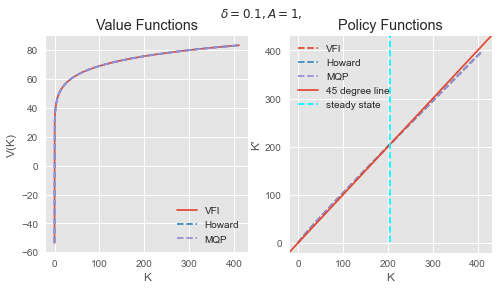

In [18]:
plt.rcParams["figure.figsize"] = (8,4)
fig,ax = plt.subplots(1,2)

ax[0].plot(G_k_vfi,V_vfi, '-', label='VFI')
ax[0].plot(G_k_vfi,V_Howard, '--', label='Howard')
ax[0].plot(G_k_vfi,V_MQP,'--', label='MQP')
ax[1].plot(G_k_vfi,G_k_vfi[Γ_Howard], '--', label='VFI')
ax[1].plot(G_k_vfi,G_k_vfi[Γ_Howard], '--', label='Howard')
ax[1].plot(G_k_vfi,G_k_vfi[Γ_Howard],'--', label='MQP')
ax[0].set_xlabel('K')
ax[1].set_xlabel('K')
ax[0].set_ylabel('V(K)')
ax[1].set_ylabel("K'")
ax[1].axline((np.min(G_k_vfi),np.min(G_k_vfi)), (np.max(G_k_vfi),np.max(G_k_vfi)),label='45 degree line')
ax[1].axvline(x=k_ss_vfi,ymin=np.min(G_k_vfi), ymax=np.max(G_k_vfi), linestyle='dashed',label='steady state', color='cyan' )
ax[0].set_title('Value Functions')
ax[1].set_title('Policy Functions')
ax[0].legend()
ax[1].legend()
fig.suptitle('$\delta = 0.1, A=1,\alpha=0.7,\beta = 0.96, \text{grid size = 1001}$')

plt.show()

As you can see, all the methods give the same value function.

In [16]:
def Howard_Multiple():
    M = [5,10,25,100,500]
    abc = {}
    for i in M:
        start_time = time.time()
        V, Γ, iteration, dist = Howard(δ=0.1, grid_size=1001, m=i, β=0.96,A=1)
        end_time = time.time()
        t = end_time - start_time
        abc[i] = str(np.round(t,2)) + 's'
    return abc

time_di = Howard_Multiple()

df = pd.DataFrame.from_dict(time_di.items())
df = df.rename(columns={0:'Howard steps', 1:'Time elapsed'})
df['VFI Time'] = ['1.92s','1.92s','1.92s','1.92s','1.92s']
df['MQP: each iteration'] = ['0.9s','0.9s','0.9s','0.9s','0.9s']
df['MQP: every 5 iteration'] = ['0.92s','0.92s','0.92s','0.92s','0.92s']

df

,Howard steps,Time elapsed,VFI Time,MQP: each iteration,MQP: every 5 iteration
0,5,1.03s,1.92s,0.9s,0.92s
1,10,0.27s,1.92s,0.9s,0.92s
2,25,0.2s,1.92s,0.9s,0.92s
3,100,0.25s,1.92s,0.9s,0.92s
4,500,0.53s,1.92s,0.9s,0.92s


As you can see, MQP did improve VFI, but the best improvement we get is from Howard with 25 steps.